In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist.target.shape

(70000,)

In [4]:
X, y = mnist.data , mnist.target
X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]

In [ ]:
a = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    neigh.score(X_test, y_test)
    a.append(neigh.score(X_test, y_test))

In [ ]:
b = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i , metric='cosine')
    neigh.fit(X_train, y_train)
    neigh.score(X_test, y_test)
    b.append(neigh.score(X_test, y_test))

Построим результыты на графике

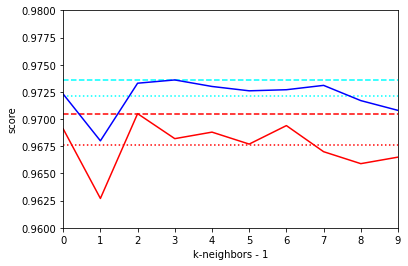

In [ ]:
plt.plot(a, color= 'red')
plt.plot(b , color = 'blue')
plt.ylim(0.96,0.98)
plt.xlim(0,9)
plt.hlines(np.max(a) , 0 , 9 , linestyle = '--', color = 'red')
plt.hlines(np.mean(a) , 0 , 9 , linestyle = ':', color = 'red')
plt.hlines(np.max(b) , 0 , 9 , linestyle = '--', color = 'aqua')
plt.hlines(np.mean(b) , 0 , 9 , linestyle = ':', color = 'aqua')
plt.xlabel('k-neighbors - 1')
plt.ylabel('score')
plt.show()

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=np.argmax(b), metric= 'cosine')
X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)


0.9733

введем взвешивание по дистанции в диапазоне от 2ух до 6ти ближайших соседней, так как хорошо видно что  при увеличении k падает точность модели



In [ ]:
neigh = KNeighborsClassifier(n_neighbors=np.argmax(b), metric= 'cosine' , weights = 'distance')
X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)


0.9742

In [5]:
b_dist = []
for i in range(2,6):
    neigh = KNeighborsClassifier(n_neighbors=i , metric='cosine', weights = 'distance')
    X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
    neigh.fit(X_train, y_train)
    neigh.score(X_test, y_test)
    b_dist.append(neigh.score(X_test, y_test))

In [6]:
np.max(b_dist)

0.9752

In [4]:
a_dist = []
for i in range(2,6):
    neigh = KNeighborsClassifier(n_neighbors=i , weights = 'distance')
    X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
    neigh.fit(X_train, y_train)
    neigh.score(X_test, y_test)
    a_dist.append(neigh.score(X_test, y_test))

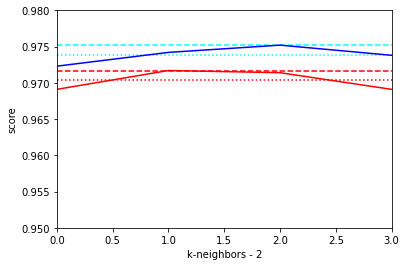

In [6]:
plt.plot(a_dist, color= 'red')
plt.plot(b_dist , color = 'blue')
plt.ylim(0.95,0.98)
plt.xlim(0,3)
plt.hlines(np.max(a_dist) , 0 , 3, linestyle = '--', color = 'red')
plt.hlines(np.mean(a_dist) , 0 , 3 , linestyle = ':', color = 'red')
plt.hlines(np.max(b_dist) , 0 ,3 , linestyle = '--', color = 'aqua')
plt.hlines(np.mean(b_dist) , 0 , 3 , linestyle = ':', color = 'aqua')
plt.xlabel('k-neighbors - 2')
plt.ylabel('score')
plt.show()

Результаты схожи с первым графиком, косинусная метрика показывает себя точно лучше при любом k, оптимальное значение К=4, но более устойчиво брать нечетное число соседей, лучший результат показывает модель при К=3, используя косунусное расстояние и мастабируя его по дистанции.

In [ ]:
np.max(a), np.max(b),np.max(a_dist),np.max(b_dist)

In [ ]:
np.argmax(a)+1, np.argmax(b)+1,np.argmax(a_dist)+2,np.argmax(b_dist)+2

Непосредственно посмотрим на модель с эти параметрами, подробнее разберем ошибки которые она допускает

In [7]:
neigh = KNeighborsClassifier(n_neighbors=3 , metric='cosine', weights = 'distance')
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)


0.9742

In [8]:
wrong_answers = np.where(neigh.predict(X_test) != y_test)

In [9]:
wrong_answers

(array([ 115,  241,  247,  257,  266,  320,  321,  358,  445,  448,  464,
         495,  551,  571,  582,  591,  628,  707,  740,  774,  839,  881,
         924,  938,  939,  947,  951,  956,  957, 1014, 1062, 1089, 1107,
        1112, 1178, 1192, 1226, 1232, 1242, 1247, 1260, 1290, 1299, 1319,
        1325, 1393, 1422, 1425, 1496, 1500, 1522, 1530, 1549, 1553, 1559,
        1681, 1695, 1721, 1737, 1790, 1865, 1901, 1955, 1970, 1984, 2040,
        2044, 2052, 2093, 2098, 2105, 2109, 2118, 2129, 2130, 2135, 2182,
        2224, 2237, 2272, 2293, 2298, 2299, 2339, 2387, 2395, 2406, 2408,
        2422, 2447, 2454, 2488, 2533, 2597, 2607, 2648, 2654, 2721, 2758,
        2771, 2810, 2863, 2896, 2901, 2927, 2939, 2952, 2953, 3005, 3060,
        3062, 3073, 3117, 3206, 3269, 3333, 3336, 3369, 3405, 3475, 3490,
        3503, 3520, 3549, 3558, 3559, 3597, 3629, 3702, 3727, 3730, 3742,
        3780, 3806, 3808, 3811, 3838, 3853, 3893, 3902, 3926, 3941, 3946,
        3976, 3985, 4007, 4017, 4075, 

Нарисуем некоторые цифры в которых ошибаемся

1
3


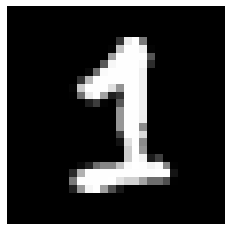

9
7


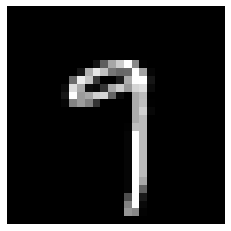

2
7


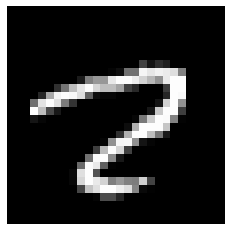

3
7


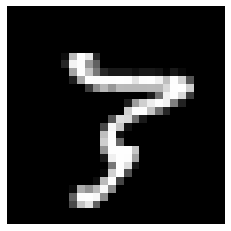

5
3


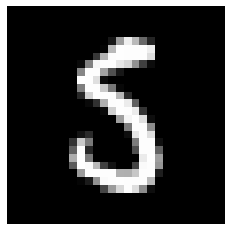

5
8


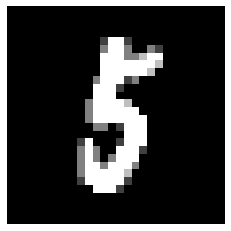

8
7


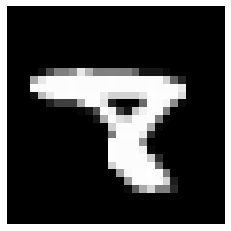

9
1


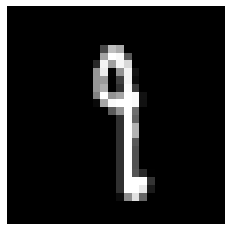

3
5


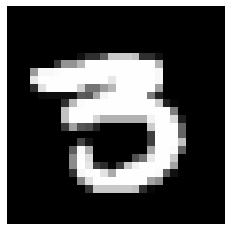

7
9


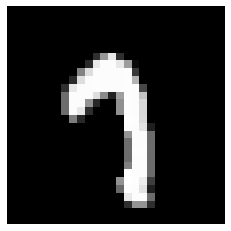

4
9


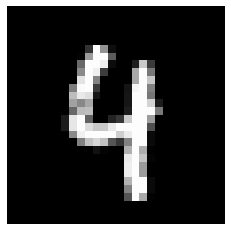

In [10]:
for item in [4212, 4224, 4289, 4306, 4330, 4356, 4497, 4500, 4552, 4578, 4598]:
  plt.imshow(np.reshape(X_test[item], (28,28)), cmap ='gray')
  plt.axis("off")
  print(y_test[item])
  print(neigh.predict(X_test)[item])
  plt.show()

видно что ошибки допущены в действительно сомнительных написаниях цифр, с явно не стандартным подчерком, в основном модель работает хорошо

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, neigh.predict(X_test))

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1130,    3,    1,    0,    0,    1,    0,    0,    0],
       [   8,    1, 1009,    1,    1,    0,    0,    8,    4,    0],
       [   0,    1,    3,  975,    0,   13,    0,    5,    7,    6],
       [   2,    2,    0,    0,  946,    0,    6,    1,    1,   24],
       [   4,    0,    0,    9,    1,  859,    7,    1,    6,    5],
       [   4,    2,    0,    0,    2,    3,  947,    0,    0,    0],
       [   1,   10,    6,    0,    1,    0,    0,  996,    0,   14],
       [   6,    2,    2,   10,    4,    4,    4,    3,  936,    3],
       [   8,    7,    2,    5,    7,    3,    1,    6,    3,  967]])